# Wine Quality and Student Performance Analysis

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



### Question 1. Key Features of Wine Quality Dataset

The wine dataset contains 13 physicochemical features that describe the chemical composition and characteristics of wine samples. These features are crucial in determining wine quality. 

### Feature Descriptions:
- **Alcohol**: Positively associated with better fermentation and perceived quality.
- **Malic Acid**: Influences acidity and freshness.
- **Ash**: Mineral content from grapes/soil.
- **Alcalinity of Ash**: Affects buffering capacity and balance.
- **Magnesium**: Related to wine stability and color.
- **Total Phenols & Flavanoids**: Impact taste, bitterness, and aging.
- **Nonflavanoid Phenols**: Affect wine stability.
- **Proanthocyanins**: Contribute to astringency.
- **Color Intensity**: Indicates depth of wine's color, often linked to flavor.
- **Hue**: Tint of the wine.
- **OD280/OD315**: Optical density for phenolic content.
- **Proline**: Amino acid indicative of grape ripeness.


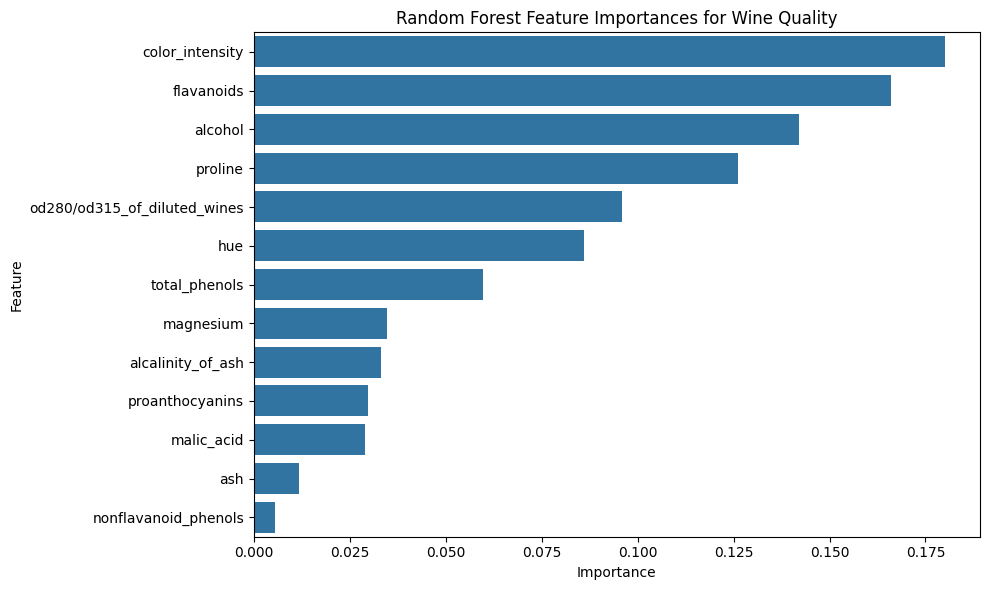

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [2]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare dataset
X = wine_df.drop(columns='target')
y = wine_df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Feature importances
feature_importances = pd.DataFrame({
    'Feature': wine_df.columns[:-1],
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Random Forest Feature Importances for Wine Quality")
plt.tight_layout()
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))


In [ ]:
# Key features of wine quality dataset:
# alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols,
# flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity,
# hue, od280/od315_of_diluted_wines, proline
# These affect fermentation, color, taste, chemical composition, and aging potential.


### Question 2. Handling Missing Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load dataset
wine_df = load_wine(as_frame=True).frame

# Simulate missing values
wine_df_missing = wine_df.copy()
wine_df_missing.loc[::10, 'magnesium'] = np.nan

# Impute with mean
wine_df_missing['magnesium'] = wine_df_missing['magnesium'].fillna(wine_df_missing['magnesium'].mean())


### Question 3. Key Factors Affecting Student Performance
Student performance is influenced by both academic and non-academic factors:

- **Academic Factors**:
  - **StudyTimeWeekly**: More time spent studying usually improves understanding and GPA.
  - **Absences**: Frequent absences negatively impact learning outcomes.
  - **Tutoring**: Personalized support can help students with weaker areas.

- **Non-Academic Factors**:
  - **ParentalSupport**: Support from parents can boost motivation and focus.
  - **Extracurriculars (Sports, Music, Volunteering)**: These contribute to a well-rounded personality and can positively impact academic outcomes indirectly.
  - **Socio-demographic features**: Gender, Ethnicity, and Parental Education can have contextual influence.

**Statistical Techniques for Analysis**:
- **Correlation Analysis**: To find linear relationships.
- **Regression Models**: Predict GPA based on various features.
- **ANOVA**: Compare GPA across categorical groups (e.g., Gender).
- **Tree-Based Feature Importance**: Use decision trees or random forests to rank feature importance.

In [ ]:
# Key factors: StudyTimeWeekly, Absences, Tutoring, ParentalSupport,
# Extracurricular, Sports, Music, GPA

# Statistical methods:
# - Correlation matrix
# - Linear regression
# - ANOVA for categorical
# - Feature importance from decision trees


### Question 4. Feature Engineering on Student Performance Dataset

In [5]:
student_df = pd.read_csv("/Users/tharunmk/Downloads/Student_performance_data _ (1).csv")

# Feature creation
student_df['EngagementScore'] = student_df['StudyTimeWeekly'] - student_df['Absences']
student_df['GPA_Level'] = pd.cut(student_df['GPA'], bins=[0,1,2.5,3.5,4.0], labels=['Low','Moderate','Good','Excellent'])
student_df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,EngagementScore,GPA_Level
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,12.833723,Good
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,15.408756,Good
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,-21.789430,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,-3.971171,Moderate
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,-12.327505,Moderate


### Question 5. EDA and Normality Check for Wine Dataset

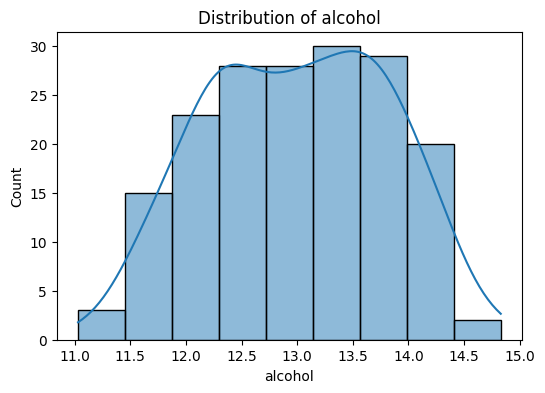

alcohol: Shapiro-Wilk p-value = 0.0200


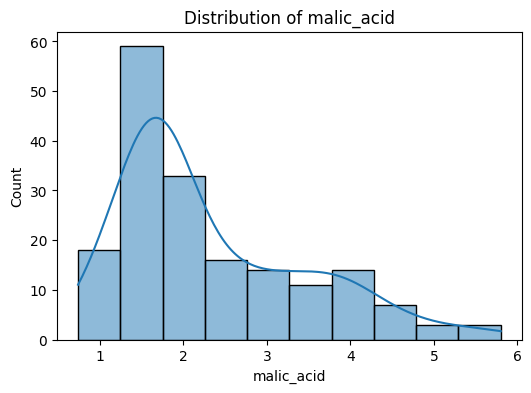

malic_acid: Shapiro-Wilk p-value = 0.0000


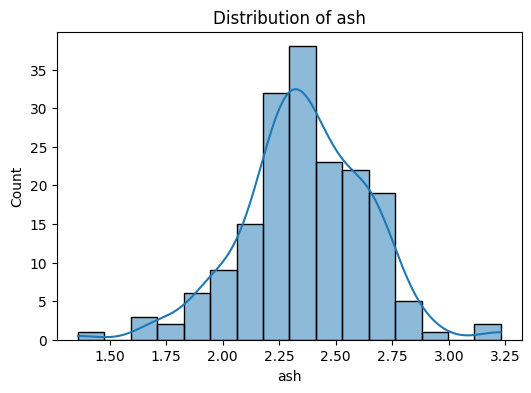

ash: Shapiro-Wilk p-value = 0.0387


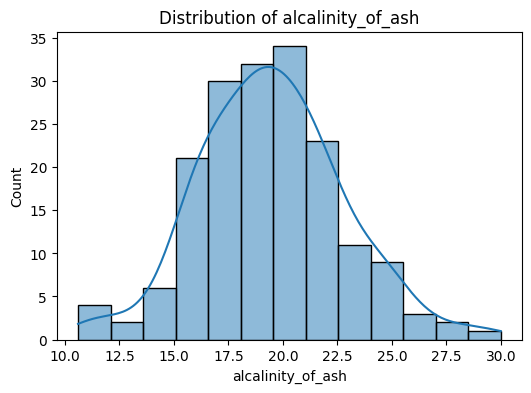

alcalinity_of_ash: Shapiro-Wilk p-value = 0.2639


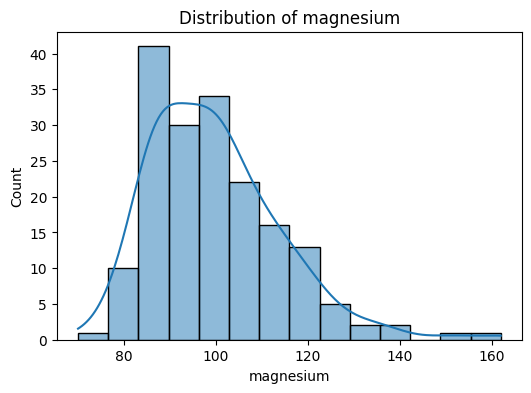

magnesium: Shapiro-Wilk p-value = 0.0000


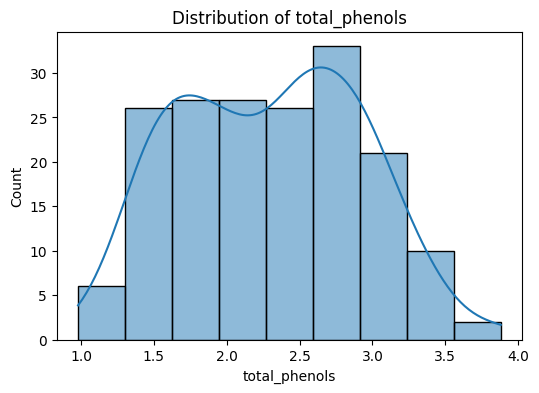

total_phenols: Shapiro-Wilk p-value = 0.0044


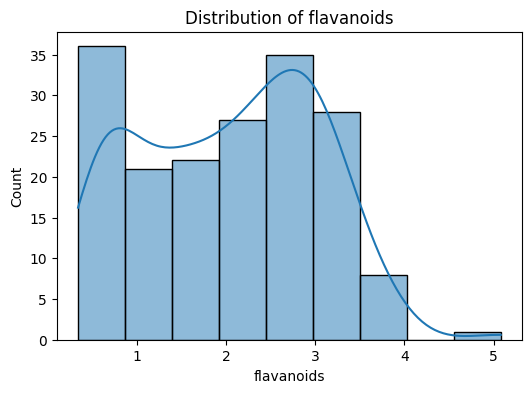

flavanoids: Shapiro-Wilk p-value = 0.0000


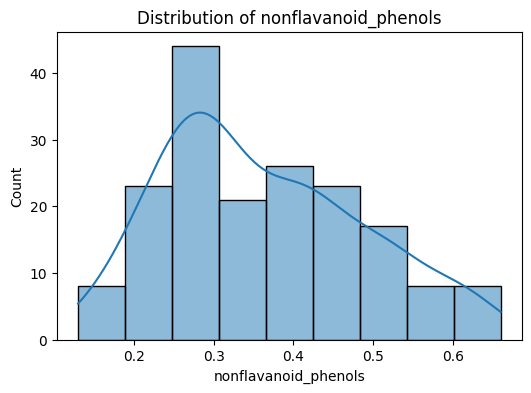

nonflavanoid_phenols: Shapiro-Wilk p-value = 0.0001


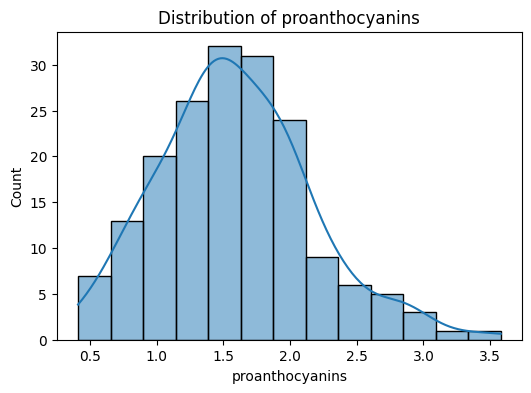

proanthocyanins: Shapiro-Wilk p-value = 0.0145


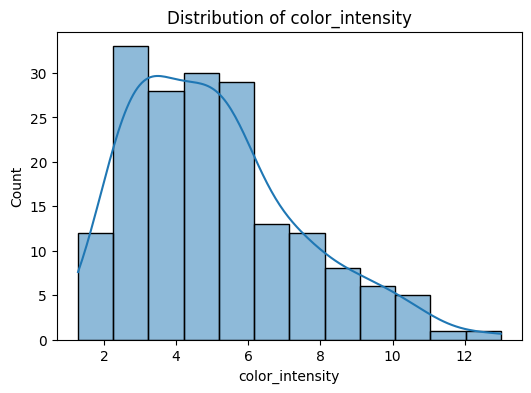

color_intensity: Shapiro-Wilk p-value = 0.0000


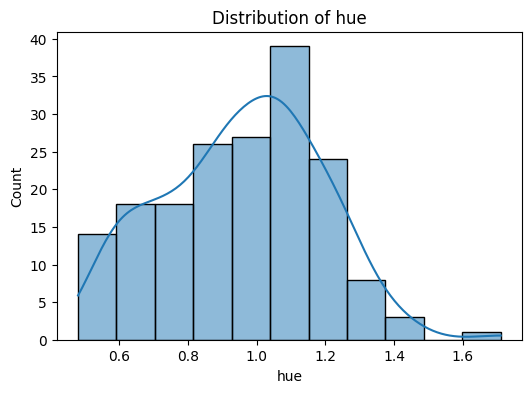

hue: Shapiro-Wilk p-value = 0.0174


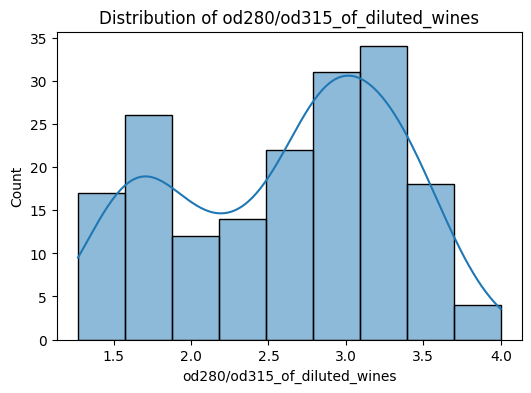

od280/od315_of_diluted_wines: Shapiro-Wilk p-value = 0.0000


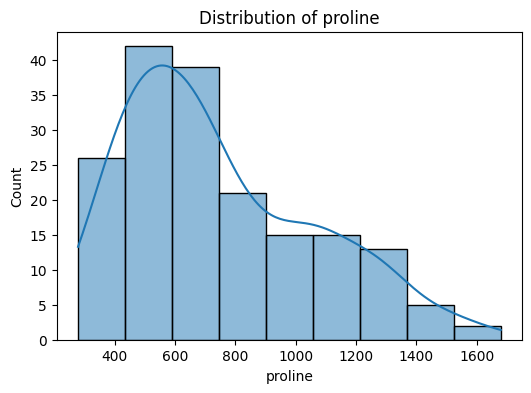

proline: Shapiro-Wilk p-value = 0.0000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot distributions
for col in wine_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(wine_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    stat, p = stats.shapiro(wine_df[col])
    print(f"{col}: Shapiro-Wilk p-value = {p:.4f}")


## Normality Test

In [7]:
from scipy.stats import shapiro

# Check for normality
normality_results = []
for col in wine_df.columns[:-1]:
    stat, p_value = shapiro(wine_df[col])
    normality_results.append((col, p_value))

normality_df = pd.DataFrame(normality_results, columns=['Feature', 'Shapiro_PValue'])
normality_df['Non_Normal'] = normality_df['Shapiro_PValue'] < 0.05

# Display features with non-normality
non_normal_features = normality_df[normality_df['Non_Normal']]['Feature'].tolist()
normality_df


,Feature,Shapiro_PValue,Non_Normal
0,alcohol,2.004798e-02,True
1,malic_acid,2.945801e-10,True
2,ash,3.868278e-02,True
3,alcalinity_of_ash,2.638688e-01,False
4,magnesium,6.345694e-07,True
5,total_phenols,4.395305e-03,True
6,flavanoids,1.678853e-05,True
7,nonflavanoid_phenols,1.055100e-04,True
8,proanthocyanins,1.445403e-02,True
9,color_intensity,9.229210e-07,True


### Transformations

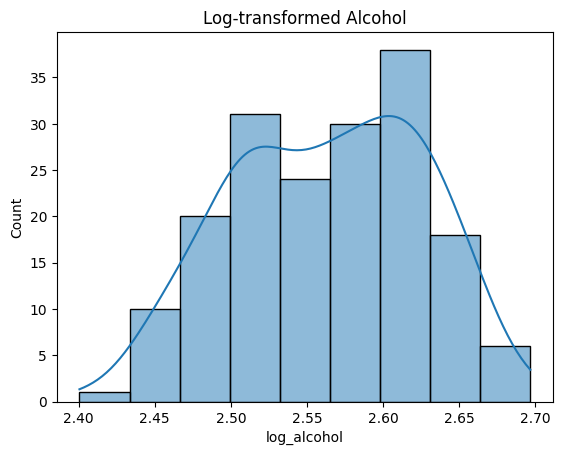

In [8]:
# Suggested transformations:
# Log Transform: alcohol, magnesium, total_phenols, flavanoids, proline
# Box-Cox: malic_acid, ash, color_intensity, proanthocyanins
# Yeo-Johnson: nonflavanoid_phenols, hue

# Apply log transformation
wine_df['log_alcohol'] = np.log(wine_df['alcohol'])

# Visualize transformed feature
sns.histplot(wine_df['log_alcohol'], kde=True)
plt.title('Log-transformed Alcohol')
plt.show()



### Question 2. Handling Missing Data in the Wine Quality Dataset

In this project, the wine dataset was used to explore real-world chemical data. we simulate missing data for the purpose of demonstrating imputation. Real-world datasets often have missing values due to measurement errors, sensor failures, or data entry issues.

### Techniques to Handle Missing Data:
- **Mean Imputation**: Replace missing values with the mean of the column. Simple and fast but can reduce variance.
- **Median Imputation**: More robust to outliers.
- **Mode Imputation**: Best for categorical data.
- **KNN Imputation**: Uses neighboring feature similarity but is computationally intensive.
- **Regression Imputation**: Predicts missing values using linear models.


In [9]:

# Simulate missing values
wine_df_missing = wine_df.copy()
wine_df_missing.loc[::10, 'magnesium'] = np.nan

# Mean imputation
wine_df_missing['magnesium_mean'] = wine_df_missing['magnesium'].fillna(wine_df_missing['magnesium'].mean())

# Median imputation
wine_df_missing['magnesium_median'] = wine_df_missing['magnesium'].fillna(wine_df_missing['magnesium'].median())

# Compare imputations
wine_df_missing[['magnesium', 'magnesium_mean', 'magnesium_median']].head(10)


,magnesium,magnesium_mean,magnesium_median
0,NaN,99.3125,98.0
1,100.0,100.0000,100.0
2,101.0,101.0000,101.0
3,113.0,113.0000,113.0
4,118.0,118.0000,118.0
5,112.0,112.0000,112.0
6,96.0,96.0000,96.0
7,121.0,121.0000,121.0
8,97.0,97.0000,97.0
9,98.0,98.0000,98.0



### Question 3. Key Factors Affecting Student Performance

Student success in exams depends on a variety of academic and lifestyle-related factors. We analyze these using statistical techniques such as:

- **Correlation Analysis**: Understand relationships between numerical features and GPA.
- **ANOVA**: Analyze how categorical features affect GPA.
- **Regression Modeling**: Predict GPA based on selected features.


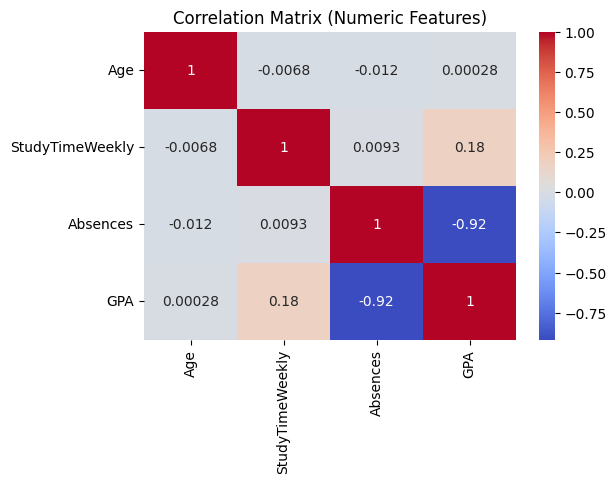

ANOVA test result (Gender vs GPA): F_onewayResult(statistic=np.float64(0.426664697870869), pvalue=np.float64(0.5136929146252319))


In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Correlation heatmap for numeric features
numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
plt.figure(figsize=(6, 4))
sns.heatmap(student_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# ANOVA: Effect of Gender on GPA
grouped = student_df.groupby('Gender')['GPA']
anova_result = stats.f_oneway(*[group[1] for group in grouped])
print("ANOVA test result (Gender vs GPA):", anova_result)



### Question 4. Feature Engineering in the Student Performance Dataset

Feature engineering helps improve model performance by creating, transforming, or encoding relevant data attributes.

### Steps Taken:
- Created `EngagementScore` as a new feature: `StudyTimeWeekly - Absences`.
- Binned GPA into categories: Low, Moderate, Good, Excellent.
- Encoded categorical values where necessary.


In [11]:

# Create new features
student_df['EngagementScore'] = student_df['StudyTimeWeekly'] - student_df['Absences']
student_df['GPA_Level'] = pd.cut(student_df['GPA'], bins=[0, 1, 2.5, 3.5, 4.0], labels=['Low', 'Moderate', 'Good', 'Excellent'])

# Check result
student_df[['GPA', 'EngagementScore', 'GPA_Level']].head()


,GPA,EngagementScore,GPA_Level
0,2.929196,12.833723,Good
1,3.042915,15.408756,Good
2,0.112602,-21.789430,Low
3,2.054218,-3.971171,Moderate
4,1.288061,-12.327505,Moderate



### Question 5. EDA on Wine Quality Dataset and Normality Check




Non-normal features (p < 0.05):
                         Feature  Shapiro_PValue  Non_Normal
0                        alcohol    2.004798e-02        True
1                     malic_acid    2.945801e-10        True
2                            ash    3.868278e-02        True
4                      magnesium    6.345694e-07        True
5                  total_phenols    4.395305e-03        True
6                     flavanoids    1.678853e-05        True
7           nonflavanoid_phenols    1.055100e-04        True
8                proanthocyanins    1.445403e-02        True
9                color_intensity    9.229210e-07        True
10                           hue    1.742550e-02        True
11  od280/od315_of_diluted_wines    2.316064e-06        True
12                       proline    1.741260e-07        True
13                        target    3.526580e-14        True


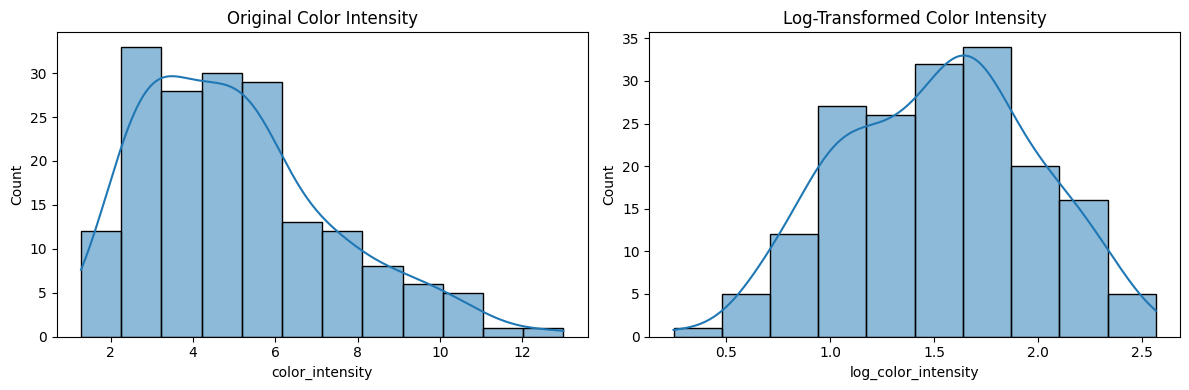

In [12]:

from scipy.stats import shapiro
import numpy as np

# Check for normality
normality_results = []
for col in wine_df.columns[:-1]:
    stat, p_value = shapiro(wine_df[col])
    normality_results.append((col, p_value))

normality_df = pd.DataFrame(normality_results, columns=['Feature', 'Shapiro_PValue'])
normality_df['Non_Normal'] = normality_df['Shapiro_PValue'] < 0.05
print("Non-normal features (p < 0.05):")
print(normality_df[normality_df['Non_Normal']])

# Example transformation
wine_df['log_color_intensity'] = np.log(wine_df['color_intensity'])

# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(wine_df['color_intensity'], kde=True, ax=axes[0])
axes[0].set_title("Original Color Intensity")
sns.histplot(wine_df['log_color_intensity'], kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Color Intensity")
plt.tight_layout()
plt.show()
